## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# Respuestas

## Librerías

In [1]:
#!pip install nltk holoviews tpot

In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [4]:
import re
import string

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [6]:
nltk.download("punkt")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/ecandaudap/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ecandaudap/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import gensim
from gensim.models import Word2Vec

In [8]:
from wordcloud import WordCloud
from collections import Counter

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

In [10]:
import torch

In [11]:
from tpot import TPOTClassifier

In [12]:
from scipy.sparse import csr_matrix

## Actividad 1. Limpieza y EDA

### Carga y limpieza de Bases de Datos

In [13]:
#from google.colab import drive
#drive.mount('/content/drive')

Vamos a cargar un archivo que, según Kaggle, contiene las primeras 100 reseñas "más relevantes" de cada aplicación. Cada texto/comentario de revisión ha sido preprocesado y se le han atribuido 3 nuevas características: sentimiento, polaridad del sentimiento y subjetividad del sentimiento.

In [14]:
# Carga de datos ruser reviews
df_reviews = pd.read_csv('googleplaystore_user_reviews.csv')

In [15]:
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Se carga ahora este nuevo data frame que contiene detalles de las aplicaciones en Google Play

In [16]:
# Carga de datos de detalles de las App de Google Play Store
df_details = pd.read_csv('googleplaystore.csv')

In [17]:
df_details.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### df_reviews

Acorde a lo observado en la información del df_reviews, faltan valores en casi todas las variables, excepto en la variabla *App*, que recoge el nombre de la App evaluada.

In [18]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Como vemos, la catidad de datos faltantes es igual en cada columna, lo que se debe a que la evaluación de sentimientos, así como la polaridad de los mismos y la subjetividad dependen de la existencia de un *Translated Review*, por lo que si ésta falta no puede haber ninguna de las 3 restantes.

In [19]:
# Número de datos faltantes
df_reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

El número de reviews por App es mayor a lo indicado en la descripción que hace Kaggle de esta base de datos, ya que el número de reviews es mayor a 100 y si hay faltantes, claramente no son las más relevantes.

Más adelante se observa que aún quitando los valores faltantes, el número de reviews en gran parte de las Apps es mayor a 100.

In [20]:
# Número de reviews por App
df_reviews['App'].value_counts()

App
Angry Birds Classic                                  320
CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Name: count, Length: 1074, dtype: int64

In [21]:
# Se renueven los valores faltantes, que, en este caso son aquellas reviews en donde falta la "Translated Review"
df_reviews.dropna(inplace= True)

In [22]:
# Ejemplo de una App, ya sin datos faltantes.
df_reviews[df_reviews['App'] == 'Angry Birds Classic']

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
7352,Angry Birds Classic,Way many ads. I remember Angry Birds first cam...,Negative,-0.125000,0.483333
7353,Angry Birds Classic,Angry Birds used game could tap play heart's c...,Negative,-0.065909,0.588636
7355,Angry Birds Classic,"Good job Rovio, good job joining pay play band...",Positive,0.266667,0.583333
7356,Angry Birds Classic,"The ""Mighty League"" part unplayable. It consta...",Negative,-0.073333,0.400000
7357,Angry Birds Classic,The Miller lite beer ads really need removed. ...,Positive,0.250000,0.537500
...,...,...,...,...,...
7666,Angry Birds Classic,I'm really sick games have/show exit without r...,Negative,-0.892857,0.857143
7667,Angry Birds Classic,Used love old version. One adventure another w...,Positive,0.026531,0.336735
7668,Angry Birds Classic,The game freezing levels makes restart device ...,Negative,-0.012500,0.300000
7669,Angry Birds Classic,"I like play Angry Birds, constantly freezing e...",Negative,-0.250000,0.666667


In [23]:
# Número de reviews después de eliminar aquellas en donde hay información faltante.
df_reviews['App'].value_counts()

App
Bowmasters                        312
Helix Jump                        273
Angry Birds Classic               273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
                                 ... 
Draw a Stickman: EPIC 2             1
HD Camera                           1
Draw In                             1
Draw A Stickman                     1
Best Fiends - Free Puzzle Game      1
Name: count, Length: 865, dtype: int64

In [24]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


#### df_details

In [25]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Una vez más la información que se nos dió, al inicio en Kaggle no es del todo precisa, ya que se esperaría que cada App se mostrara una sola vez y que la información fuera congruente, sin embargo se encontraron casos emblemáticos, como el que se muestra en la siguiente casilla *'Duolingo: Learn Languages Free'* en donde no solo la información se repite si no que lo hace de forma incongruente ya que cambia la Categoria, como se puede observar.


In [26]:
df_details[df_details['App'] == 'Duolingo: Learn Languages Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
699,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
784,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
799,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
826,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
2056,Duolingo: Learn Languages Free,FAMILY,4.7,6294400,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
2216,Duolingo: Learn Languages Free,FAMILY,4.7,6294397,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
8439,Duolingo: Learn Languages Free,FAMILY,4.7,6297590,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 6, 2018",Varies with device,Varies with device


La información cambia en 'Category', en 'Review' y en 'Last Updated' solamente, por lo que se decidió **eliminar duplicados de cada App y dejar solo la entrada más reciente**, que se supone que es la última actualización de la información.

In [27]:
# Primer se ordena el DataFrame por la columna 'Last Update' en orden descendente
df_details = df_details.sort_values(by='Last Updated', ascending=False)

In [28]:
# Se quitan duplicados conservando la entrada más reciente (que quedó en primer lugar de cada App)
df_details_without_duplicates = df_details.drop_duplicates(subset='App', keep='first')

El resultado: Ya se eliminaron los duplicados y quedó la entrada más reciente, como se muestra en el ejemplo inferior.

In [29]:
df_details_without_duplicates[df_details_without_duplicates['App'] == 'Duolingo: Learn Languages Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8439,Duolingo: Learn Languages Free,FAMILY,4.7,6297590,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 6, 2018",Varies with device,Varies with device


Al inicio, el data Frame contenía 10,841 entradas y solo quedaron 9,660, lo que indica que había 1,181 entradas duplicadas, esto es el 10.8% de los datos originalmente proporcionados por Kaggle.

In [30]:
df_details_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 6834 to 10472
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


En esta base, de datos, como se observa, faltan datos en "Rating", "Type", "Content Rating", "Current Ver" y "Android Ver".

In [31]:
df_details_without_duplicates.isna().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

Sin embargo es en la variable "Rating" la que tiene la mayor cantidad de faltantes ( más de 1,400).

<Axes: >

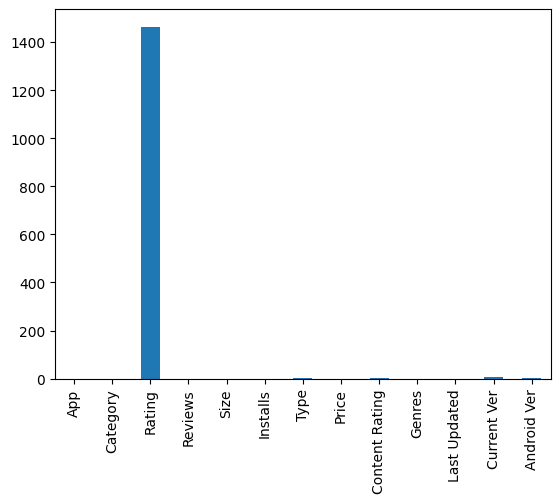

In [32]:
df_details_without_duplicates.isna().sum().plot(kind= 'bar')

Sin embargo, dado que voy a juntar ambos dataframes para realizar el análisis de sentimientos, no voy a eliminar estos faltantes hasta concluída la fusión, para evaluar, acorde a cuáles y a cuentos queden, que tratamiento se les dará.

Sin embargo, como en la base de datos de reviews se tiene información de las Apps más relevantes ( o eso creo), se esperaría que no queden datos faltantes despues del *'merge'*

#### Unión Dataframes

Dado que lo que queremos es unir las características de las App a cada review mostrada, se unirán los dataframes usando la columna App de reviews como base para la misma, por eso se establecerá un ***"left join"***, dado el órden de como se integrarán ambas bases de datos (reviews a la izquierda, details a la derecha).

In [33]:
# Se realiza left join
df = pd.merge(df_reviews, df_details_without_duplicates, on='App', how='left')

In [34]:
df.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
11720,Buienradar - weer,Rain radar: no rain expected. Look outside: ra...,Negative,-0.2500,0.304167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7973,Bancomer móvil,The application is disgusting now that they go...,Negative,-0.4375,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10399,Bloomberg Professional,Must finance,Neutral,0.0000,0.000000,FINANCE,4.1,3334,Varies with device,"500,000+",Free,0,Everyone,Finance,"July 23, 2018",Varies with device,Varies with device
30094,GRE Prep & Practice by Magoosh,High quality study go.,Positive,0.1600,0.540000,EDUCATION,4.4,3963,Varies with device,"100,000+",Free,0,Everyone,Education,"June 6, 2018",Varies with device,Varies with device
31898,Golfshot: Golf GPS + Tee Times,Great Battery life short,Positive,0.4000,0.525000,SPORTS,4.3,7543,25M,"500,000+",Free,0,Everyone,Sports,"July 11, 2018",1.31.0,4.1 and up


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37427 entries, 0 to 37426
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
 5   Category                35929 non-null  object 
 6   Rating                  35890 non-null  float64
 7   Reviews                 35929 non-null  object 
 8   Size                    35929 non-null  object 
 9   Installs                35929 non-null  object 
 10  Type                    35929 non-null  object 
 11  Price                   35929 non-null  object 
 12  Content Rating          35929 non-null  object 
 13  Genres                  35929 non-null  object 
 14  Last Updated            35929 non-null

In [36]:
df.isna().sum()

App                          0
Translated_Review            0
Sentiment                    0
Sentiment_Polarity           0
Sentiment_Subjectivity       0
Category                  1498
Rating                    1537
Reviews                   1498
Size                      1498
Installs                  1498
Type                      1498
Price                     1498
Content Rating            1498
Genres                    1498
Last Updated              1498
Current Ver               1498
Android Ver               1498
dtype: int64

En la celda inferior se revisaron las app que muestran NaN en su 'Rating' así como el número de reviews con que cuentan y se encontró que no estaban en **df_details**, por lo que, a pesar de que tienen reviews no cuentan con una descripción que nos permita categorizarlas y usar esa información para evaluarlas, por ello decidí eliminarlas.

In [37]:
df[df['Rating'].isna()]['App'].value_counts()

App
Cut the Rope 2                                        90
Home Street – Home Design Game                        57
Aprender inglés con Wlingua                           56
Easy - taxi, car, ridesharing                         46
Facetune - Ad Free                                    42
Banco Itaú                                            40
Claro                                                 40
Brasileirão Pro 2018 - Série A e B                    40
Bancomer móvil                                        40
Banco do Brasil                                       40
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                      40
Despegar.com Hoteles y Vuelos                         39
Enterprise Rent-A-Car                                 39
Blood Pressure                                        39
Domofond Недвижимость. Купить, снять квартиру.        38
Bangla Newspaper – Prothom Alo                        38
Birdays – Birthday reminder                           37
Curso de Ingles Gratis     

In [38]:
# Se observa el caso de una de las Apps que no cuentan con Rating porque no estan dentro de 'df_details' a pesar de tener reviews.
df_details_without_duplicates[df_details_without_duplicates['App'] == 'Bancomer móvil']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [39]:
# Se procede a la eliminación de filas donde no hay información suficiente, utilizando Rating.
df = df.dropna(subset=['Rating'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35890 entries, 0 to 37426
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35890 non-null  object 
 1   Translated_Review       35890 non-null  object 
 2   Sentiment               35890 non-null  object 
 3   Sentiment_Polarity      35890 non-null  float64
 4   Sentiment_Subjectivity  35890 non-null  float64
 5   Category                35890 non-null  object 
 6   Rating                  35890 non-null  float64
 7   Reviews                 35890 non-null  object 
 8   Size                    35890 non-null  object 
 9   Installs                35890 non-null  object 
 10  Type                    35890 non-null  object 
 11  Price                   35890 non-null  object 
 12  Content Rating          35890 non-null  object 
 13  Genres                  35890 non-null  object 
 14  Last Updated            35890 non-null  obj

In [41]:
df.isna().any()

App                       False
Translated_Review         False
Sentiment                 False
Sentiment_Polarity        False
Sentiment_Subjectivity    False
Category                  False
Rating                    False
Reviews                   False
Size                      False
Installs                  False
Type                      False
Price                     False
Content Rating            False
Genres                    False
Last Updated              False
Current Ver               False
Android Ver               False
dtype: bool

Como se observa en la celda superior, ya no hay Apps con información incompleta.

De las 64,295 Apps con reviews listadas al principio en el df_reviews, solo 37,427 si tenían reviews y de éstas se encontró que solo 35,890 cuentan con review y con información descriptiva completa.

In [42]:
# Número de Apps que tienen, al menos una review
df['App'].nunique()

815

In [43]:
# Listado de variables con, al menos una review.
df.App.value_counts()

App
Bowmasters                                            312
Helix Jump                                            273
Angry Birds Classic                                   273
Calorie Counter - MyFitnessPal                        254
Candy Crush Saga                                      240
                                                     ... 
Calendar+ Schedule Planner App                          1
Calculator - unit converter                             1
CBS News                                                1
Best Ovulation Tracker Fertility Calendar App Glow      1
DashClock Widget                                        1
Name: count, Length: 815, dtype: int64

Asímismo, se encontró que hay una cierta cantidad de comentarios que están duplicados. Seguramente los usuarios duplicaron los comentarios sobre la misma App, por lo que para evitar sesgo en la información se eliminarán dichos comentarios.

In [44]:
df.drop_duplicates(subset='Translated_Review', inplace=True)

Lo único que falta es identificar las variables relevantes, para lo cual se muestra el resultado final de df

In [45]:
df.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


Con esta información, eliminamos, en principio, las columnas 'Size', 'Installs', 'Current Ver', 'Android Ver' y 'Last Updated'.

In [46]:
df.drop(['Size', 'Installs', 'Current Ver', 'Android Ver', 'Last Updated'], axis=1, inplace = True)

In [47]:
df.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Type,Price,Content Rating,Genres
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,Free,0,Everyone 10+,Health & Fitness
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,Free,0,Everyone 10+,Health & Fitness


Así, con estas **25,653 reviews**, distribuidas en **812 Apps**, las cuáles se describen mediante **11 variables** (sin contar la variable 'App'), con las que se va a realizar el análisis.

### Análisis de Datos

La información de que se dispone en esta database es fundamentalmente cualitativa y los pocos datos numéricos con que se cuentan carecen de importancia para el análisis de sentimientos.

Así, la variable "Reviews" no se gráfica dado que no es importante para este tipo de análisis.

In [48]:
sns.color_palette("deep")

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

La información del DataFrame a analizar se refiere a las **815 Apps** señaladas, divididas en **33 Categorías**, de las cuáles las 5 más reseñadas son "FAMILY", "GAME", "HEALTH_AND_FITNESS", "DATING", "TRAVEL_AND_LOCAL"

In [49]:
df['Category'].nunique()

33

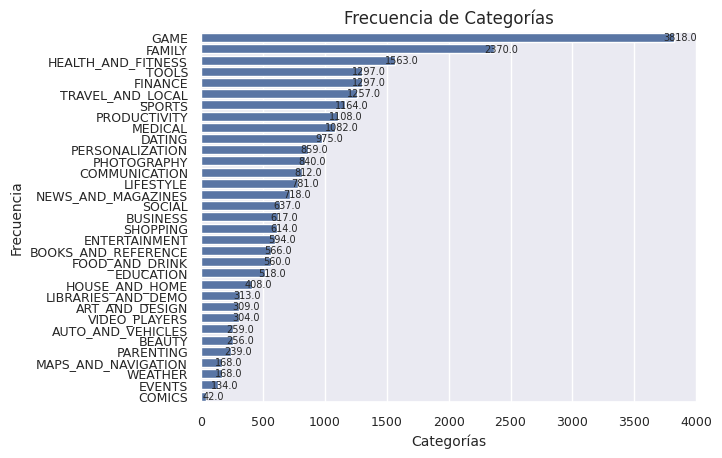

In [50]:
# Crear un gráfico de barras con Seaborn

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

ax = sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)

plt.xlabel('Categorías', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.title('Frecuencia de Categorías', fontsize=12)

# Se configura el tamaño de fuente en los ejes
ax.tick_params(axis='both', labelsize=9)

# Se agregan las etiquetas de tamaño en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points', fontsize=7)

# Se muestra el gráfico
plt.show()

Lo que si resulta de suma importancia es la distribución del tipo de sentimientos de los comentarios, los cuáles, debido a que se basan en un escrito son mucho más confiables que el Rating (Número de Estrellas de la App).

El siguiente gráfico relaciona el Rating (Número de Estrellas) con la Polaridad del Sentimiento, que evalua la intensidad positiva o negativa de cada comentario. Lo que se esperaría es que a la polaridad negativa le correspondiera un menor número de estrellas/rating y viceversa, es decir, que los datos se encontraran relacionados de alguna manera.

Sin embargo, como se observa la información está muy dispersa y carece de tendencia alguna, lo que significa que lo que los usuarios escribieron se contrapone a lo que evaluaron con estrellas (Rating).

Dado lo indicado al inicio del presente párrafo, lo lógico es basar el análisis de sentimientos en los escritos de los usuarios más que en los ratings.  

/tmp/ipykernel_60004/3466729752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Sentiment_Polarity', data=df, palette='Set3')


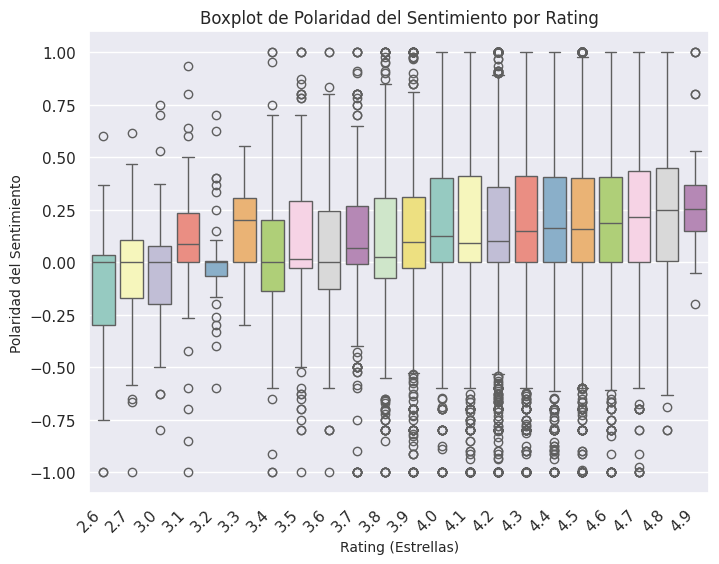

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating', y='Sentiment_Polarity', data=df, palette='Set3')

# Rotar las etiquetas del eje x angularmente
plt.xticks(rotation=45, ha='right')

plt.title('Boxplot de Polaridad del Sentimiento por Rating')
plt.xlabel('Rating (Estrellas)', fontsize = 10)
plt.ylabel('Polaridad del Sentimiento', fontsize = 10)
plt.show()

Adicionalmente, es importante notar que, en todas las App de la muestra, la polaridad de los sentimientos abarca todo el espectro (desde -1 hasta 1) lo que es un indicio de que es una buena muestra, útil para el análisis.

/tmp/ipykernel_60004/2109943200.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sentiment_Polarity', data=df, palette='Set3')


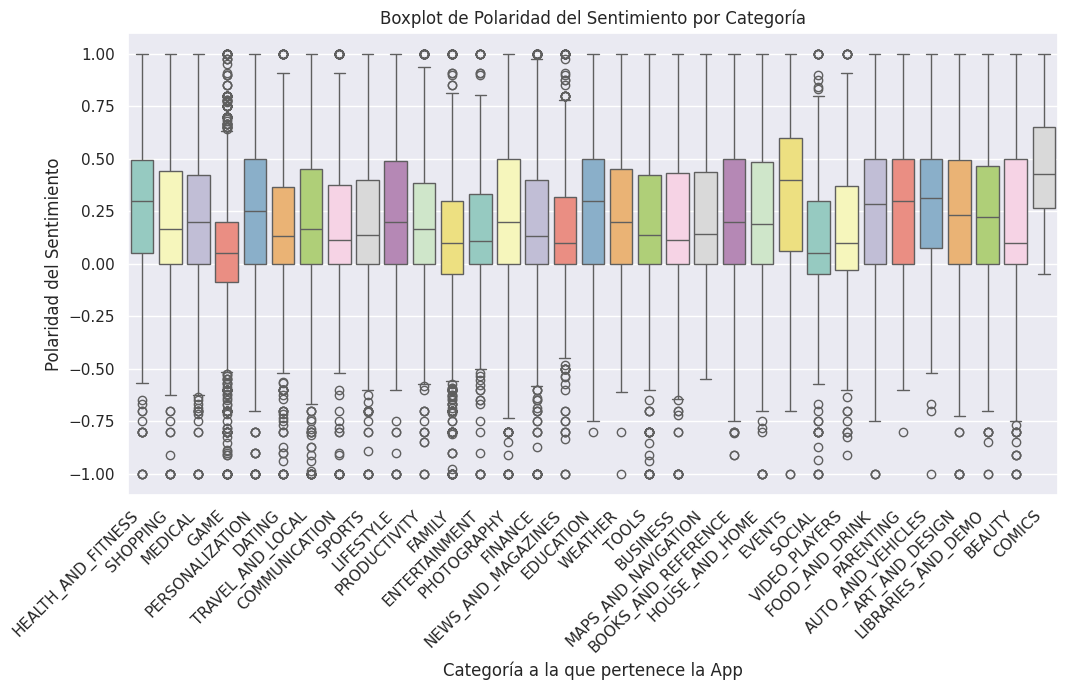

In [52]:
plt.figure(figsize=(12, 6))

# Rotar las etiquetas del eje x angularmente
plt.xticks(rotation=45, ha='right')

sns.boxplot(x='Category', y='Sentiment_Polarity', data=df, palette='Set3')
plt.title('Boxplot de Polaridad del Sentimiento por Categoría')
plt.xlabel('Categoría a la que pertenece la App')
plt.ylabel('Polaridad del Sentimiento')
plt.show()

Es importante indicar que el 64.2% de los comentarios son negativos vs el 22.3% son neutros y solo cerca del 13.5% son positivos, por lo que tenemos que ser cuidadosos con este sesgo a la hora de inmplementar el modelo.

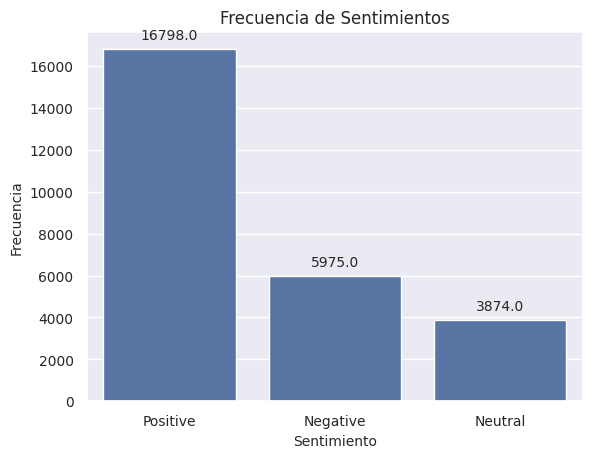

In [53]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
#sns.set(style="whitegrid")

# Se configura el tamaño de las barras
ax = sns.countplot(x='Sentiment', data=df, order=df['Sentiment'].value_counts().index)

# Se agregan etiquetas y título
plt.xlabel('Sentimiento', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.title('Frecuencia de Sentimientos', fontsize=12)

# Se configura el tamaño de fuente en los ejes
ax.tick_params(axis='both', labelsize=10)

# Se agregan las etiquetas de tamaño en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Se muestra el gráfico
plt.show()

## Actividad 2. Entrenamiento del modelo

### Función de limpieza de datos.

In [54]:
def cleantext(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text_wo_url = url_pattern.sub('', text) # Remover URLs
    text_wo_numbers = re.sub(r'\d+', '', text_wo_url) # Remover números
    text_english_only = re.sub(r'[^a-zA-Z0-9\s.,;\'"-]', '', text_wo_numbers) # Mantener solo letras inglesas y quitar demás caractéres
    text_wo_punct = text_english_only.translate(str.maketrans('', '', string.punctuation)) # Quitar signos de puntuación
    text_lower = text_wo_punct.lower() # Convertir a minúsculas
    text_wo_blank = text_lower.strip() # Eliminar espacios en blanco
    return text_wo_blank

# Limpieza de texto
df['Translated_Review'] = df['Translated_Review'].apply(cleantext)

df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Type,Price,Content Rating,Genres
0,10 Best Foods for You,i like eat delicious food thats im cooking foo...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS,4.0,2490,Free,0,Everyone 10+,Health & Fitness
1,10 Best Foods for You,this help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS,4.0,2490,Free,0,Everyone 10+,Health & Fitness
2,10 Best Foods for You,works great especially going grocery store,Positive,0.400000,0.875000,HEALTH_AND_FITNESS,4.0,2490,Free,0,Everyone 10+,Health & Fitness
3,10 Best Foods for You,best idea us,Positive,1.000000,0.300000,HEALTH_AND_FITNESS,4.0,2490,Free,0,Everyone 10+,Health & Fitness
4,10 Best Foods for You,best way,Positive,1.000000,0.300000,HEALTH_AND_FITNESS,4.0,2490,Free,0,Everyone 10+,Health & Fitness
...,...,...,...,...,...,...,...,...,...,...,...,...
37422,Housing-Real Estate & Property,most ads older many agents not much owner post...,Positive,0.173333,0.486667,LIFESTYLE,4.1,28301,Free,0,Everyone,Lifestyle
37423,Housing-Real Estate & Property,if photos posted portal load fit purpose im su...,Positive,0.225000,0.447222,LIFESTYLE,4.1,28301,Free,0,Everyone,Lifestyle
37424,Housing-Real Estate & Property,dumb app i wanted post property rent give opti...,Negative,-0.287500,0.250000,LIFESTYLE,4.1,28301,Free,0,Everyone,Lifestyle
37425,Housing-Real Estate & Property,i property business got link sms happy perform...,Positive,0.800000,1.000000,LIFESTYLE,4.1,28301,Free,0,Everyone,Lifestyle


### Tokenizar por palabras

Para tokenizar las palabras así como para eliminar las palabras vacías o de parada, se utilizará la paquetería nltk, [Natural Language Toolkit (NLKT)](https://www.nltk.org/).

In [56]:
def tokenize_by_words(text):
    return nltk.word_tokenize(text)

# Tokenizar por palabras la columna "Translated_Review"
df['Translated_Review'] = df['Translated_Review'].apply(tokenize_by_words)

df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Type,Price,Content Rating,Genres
0,10 Best Foods for You,"[i, like, eat, delicious, food, thats, im, coo...",Positive,1.000000,0.533333,HEALTH_AND_FITNESS,4.0,2490,Free,0,Everyone 10+,Health & Fitness
1,10 Best Foods for You,"[this, help, eating, healthy, exercise, regula...",Positive,0.250000,0.288462,HEALTH_AND_FITNESS,4.0,2490,Free,0,Everyone 10+,Health & Fitness
2,10 Best Foods for You,"[works, great, especially, going, grocery, store]",Positive,0.400000,0.875000,HEALTH_AND_FITNESS,4.0,2490,Free,0,Everyone 10+,Health & Fitness
3,10 Best Foods for You,"[best, idea, us]",Positive,1.000000,0.300000,HEALTH_AND_FITNESS,4.0,2490,Free,0,Everyone 10+,Health & Fitness
4,10 Best Foods for You,"[best, way]",Positive,1.000000,0.300000,HEALTH_AND_FITNESS,4.0,2490,Free,0,Everyone 10+,Health & Fitness
...,...,...,...,...,...,...,...,...,...,...,...,...
37422,Housing-Real Estate & Property,"[most, ads, older, many, agents, not, much, ow...",Positive,0.173333,0.486667,LIFESTYLE,4.1,28301,Free,0,Everyone,Lifestyle
37423,Housing-Real Estate & Property,"[if, photos, posted, portal, load, fit, purpos...",Positive,0.225000,0.447222,LIFESTYLE,4.1,28301,Free,0,Everyone,Lifestyle
37424,Housing-Real Estate & Property,"[dumb, app, i, wanted, post, property, rent, g...",Negative,-0.287500,0.250000,LIFESTYLE,4.1,28301,Free,0,Everyone,Lifestyle
37425,Housing-Real Estate & Property,"[i, property, business, got, link, sms, happy,...",Positive,0.800000,1.000000,LIFESTYLE,4.1,28301,Free,0,Everyone,Lifestyle


### Eliminación palabras vacias o palabras de parada

Las “palabras vacías” son vocablos que carecen de un significado importante y, por lo general, se eliminan de los textos.
En el presente análisis se eliminaron adicionalmente las palabras "game", "im", "app", "phone",  "also" "like", "get" y "would", que no se eliminaron usando stopwords y que no se considera aporten información adiconal al análisis. En particular, las palabras "game o "app" se refieren a lo que se está reseñando, "phone" al dispositivo en que se bajan ( se utiliza en los 3 sentimientos) "im" es la contracción mal escrita de "I am", "like" puede significar gustar o como (lo cual genera distorsiones en este contexto), "also" es un adverbio que aparece en cualquier sentimiento y "would" es un auxiliar.

In [57]:
stop_words_english = set(stopwords.words('english')) # se selecciona el idioma
stop_words_english.update(["game", "im", "ive", "app", "phone", "also", "like",
                           "get", "would", "even", "play", "much", "many"])

# Función para eliminar palabras de parada
def remove_stopwords(tokenized_text):
    return [word for word in tokenized_text if word not in stop_words_english]

# Aplicar la función a la columna 'Texto Tokenizado'
df['reviews_without_stopwords'] = df['Translated_Review'].apply(remove_stopwords)

# Mostrar el DataFrame resultante
df['reviews_without_stopwords']

0        [eat, delicious, food, thats, cooking, food, c...
1        [help, eating, healthy, exercise, regular, basis]
2        [works, great, especially, going, grocery, store]
3                                         [best, idea, us]
4                                              [best, way]
                               ...                        
37422    [ads, older, agents, owner, posted, details, r...
37423    [photos, posted, portal, load, fit, purpose, s...
37424    [dumb, wanted, post, property, rent, give, opt...
37425    [property, business, got, link, sms, happy, pe...
37426    [useless, searched, flats, kondapur, hyderabad...
Name: reviews_without_stopwords, Length: 26647, dtype: object

### Generar Nube de palabras de acuerdo al Sentimiento del Comentario

In [58]:
# Función para generar una nube de palabras
def generate_wordcloud(reviews_without_stopwords, Sentiment):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(reviews_without_stopwords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(Sentiment)
    plt.show()

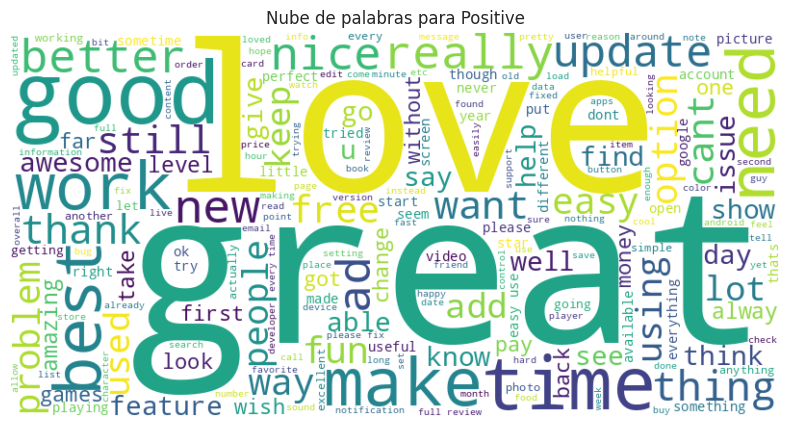

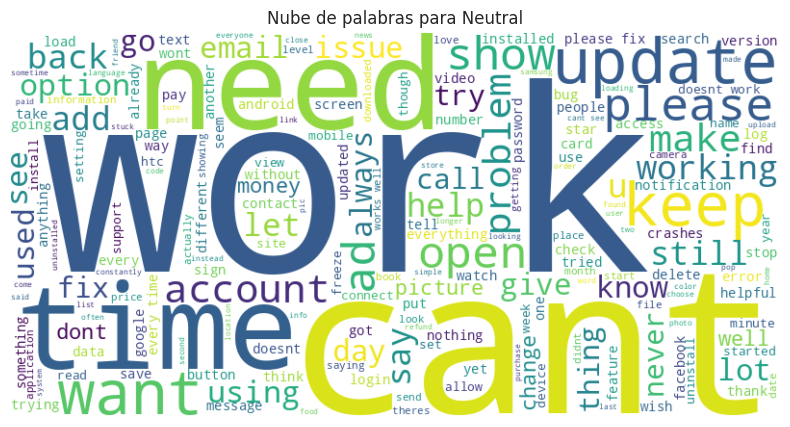

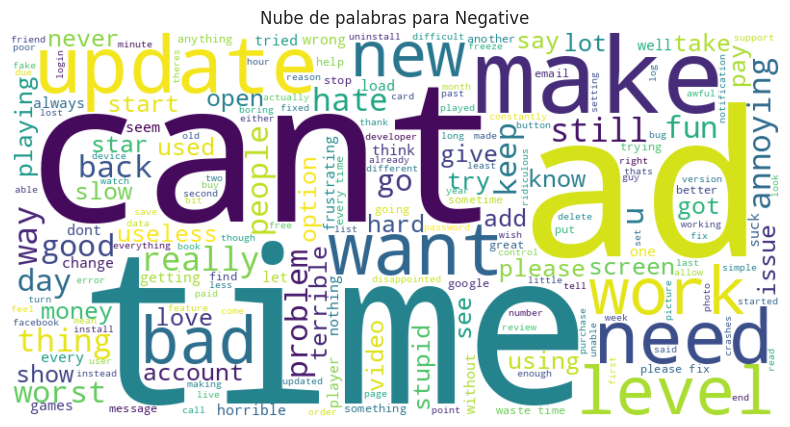

In [59]:
for category in df['Sentiment'].unique():
    subset = df[df['Sentiment'] == category]
    all_words = [word for sublist in subset['reviews_without_stopwords'] for word in sublist]
    generate_wordcloud(all_words, f'Nube de palabras para {category}')

### Las palabras más comunes por categoría

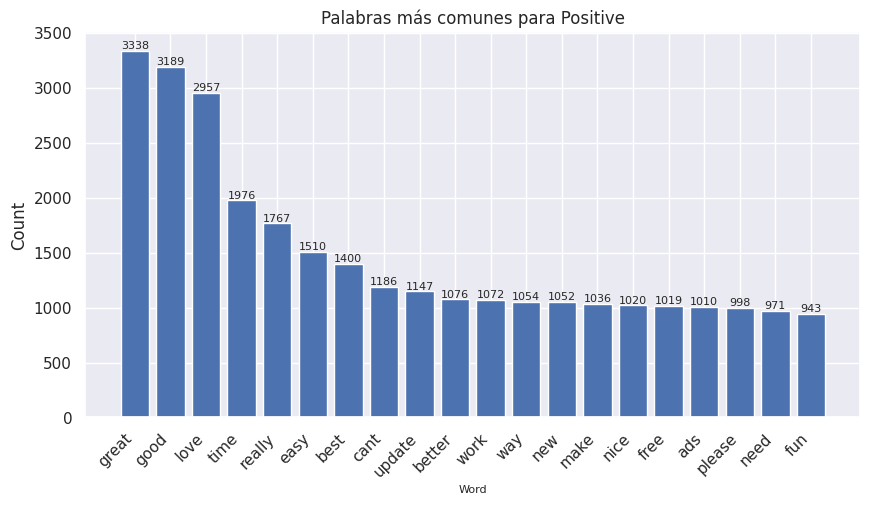

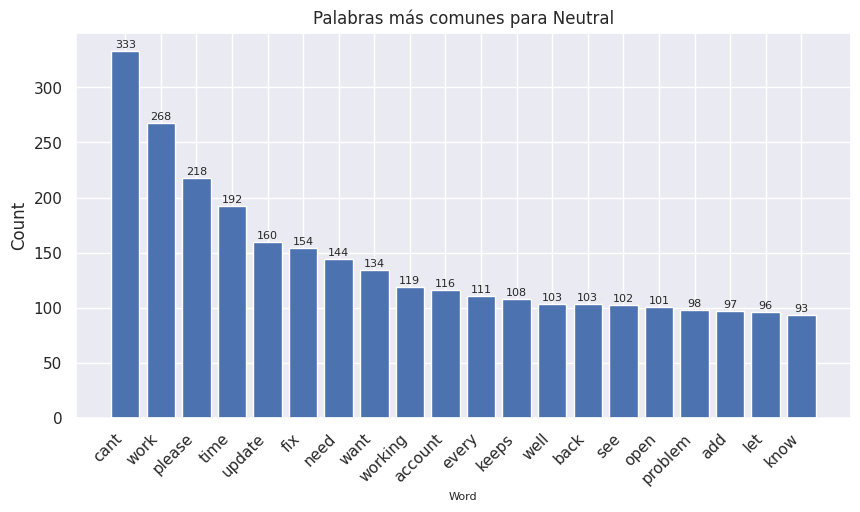

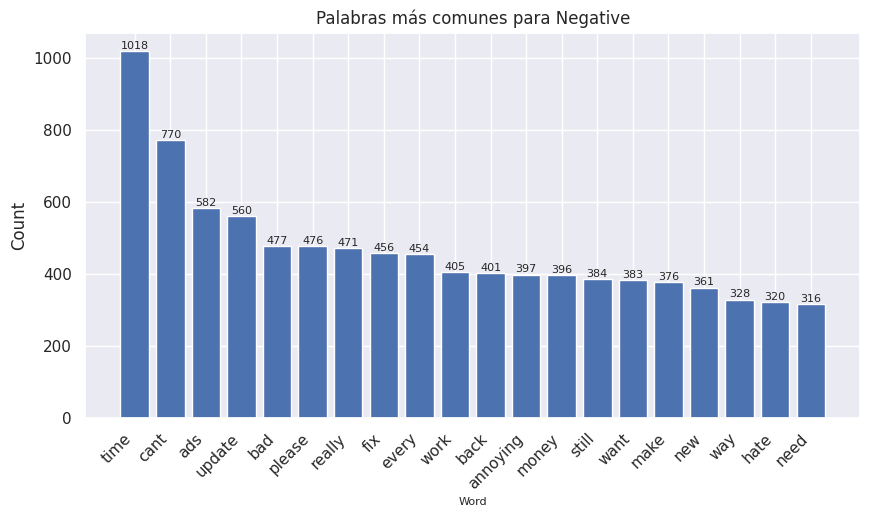

In [60]:
for category in df['Sentiment'].unique():
    subset = df[df['Sentiment'] == category]
    all_words = [word for token in subset['reviews_without_stopwords'] for word in token]
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(20)  # Las 20 palabras más comunes
    common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

    plt.figure(figsize=(10, 5))
    ax = plt.bar(common_words_df['Word'], common_words_df['Count'])

    # Rotar las etiquetas del eje x angularmente
    plt.xticks(rotation=45, ha='right')

    # Añadir etiquetas encima de las barras
    for i, valor in enumerate(common_words_df['Count']):
        plt.text(i, valor + 1, str(valor), ha='center', va='bottom', fontsize = 8)

    plt.title(f'Palabras más comunes para {category}')
    plt.xlabel('Word', fontsize = 8 )
    plt.ylabel('Count')


    plt.show()

La nube de palabras de sentimientos positivos está llena de palabras positivas, como "good", "great", "love", "free", "update".

La nube de palabras de sentimientos neutros considera palabras, como "cant", "work", "please" y "time".

La nube de palabras de sentimiento negativo se llenó en su mayoría con palabras negativas, como "time", "cant", "ads", "update", "money", "annoying"


### Vectorización de los textos para obtener relación de palabras

Tal y como se hizo en el curso, el modelo de vectorización recibirá el nombre de `model_mini` y para estimarlos se utilizará la clase `Word2Vec`, cuyos parámetros se explican el anexo del texto.

Para este ejercicio se utilizará un vec_size de 100, con la intención de capturar la mayor cantidad posible de información en los vectores a obtener (1 x 100), sin embargo los valores típicos pueden oscilar entre 50 y 300, dependiendo del caso. Asimismo, se mantuvo en  1 el conteo mínimo para que cada palabra tenga su propio vector.

In [61]:
positive = df[df['Sentiment'] == "Positive"]
negative = df[df['Sentiment'] == "Negative"]
neutral = df[df['Sentiment'] == "Neutral"]

In [62]:
model_mini_pos = Word2Vec(sentences=positive['reviews_without_stopwords'], min_count=1, vector_size=100)
model_mini_neg = Word2Vec(sentences=negative['reviews_without_stopwords'], min_count=1, vector_size=100)
model_mini_neu = Word2Vec(sentences=neutral['reviews_without_stopwords'], min_count=1, vector_size=100)

In [63]:
X_mini_pos = model_mini_pos.wv[model_mini_pos.wv.index_to_key]
X_mini_neg = model_mini_neg.wv[model_mini_neg.wv.index_to_key]
X_mini_neu = model_mini_neu.wv[model_mini_neu.wv.index_to_key]

In [64]:
# Reducimos la dimensionalidad de 100 a 2.
pca = PCA(n_components=2)

In [65]:
# Ajustamos y transformamos los datos
X_mini_2d_pos = pca.fit_transform(X_mini_pos)

In [66]:
# Obtener las proporciones de varianza explicada por cada componente principal
explained_variance_ratio_pos = pca.explained_variance_ratio_

In [67]:
# Calcular la suma acumulada de las proporciones de varianza explicada
cumulative_explained_variance_pos = np.cumsum(explained_variance_ratio_pos)

In [68]:
# Crear un DataFrame para visualizar las proporciones acumuladas de sentimientos positivos
df_cumulative_explained_variance_pos = pd.DataFrame({
    'Componente Principal': np.arange(1, len(cumulative_explained_variance_pos) + 1),
    'Proporción Acumulada de Varianza Explicada': cumulative_explained_variance_pos
})
df_cumulative_explained_variance_pos

,Componente Principal,Proporción Acumulada de Varianza Explicada
0,1,0.952837
1,2,0.977069


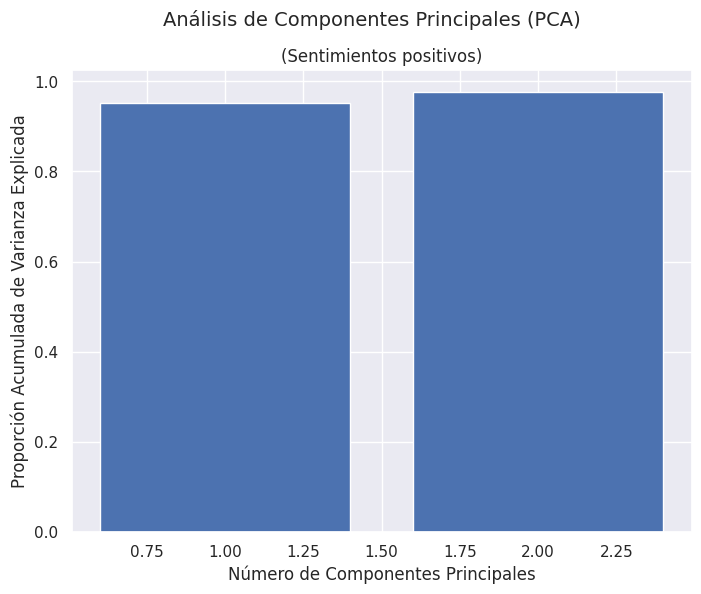

In [69]:
# Mostrar las proporciones acumuladas en un gráfico (sentimientos positivos)
plt.figure(figsize=(8, 6))
plt.bar(df_cumulative_explained_variance_pos['Componente Principal'], df_cumulative_explained_variance_pos['Proporción Acumulada de Varianza Explicada'])
plt.suptitle('Análisis de Componentes Principales (PCA)', fontsize = 14)
plt.title('(Sentimientos positivos)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.grid(True)
plt.show()

In [70]:
# Ajustamos y transformamos los datos
X_mini_2d_neg = pca.fit_transform(X_mini_neg)

In [71]:
# Obtener las proporciones de varianza explicada por cada componente principal
explained_variance_ratio_neg = pca.explained_variance_ratio_

In [72]:
# Calcular la suma acumulada de las proporciones de varianza explicada
cumulative_explained_variance_neg = np.cumsum(explained_variance_ratio_neg)

In [73]:
# Crear un DataFrame para visualizar las proporciones acumuladas de sentimientos negativos
df_cumulative_explained_variance_neg = pd.DataFrame({
    'Componente Principal': np.arange(1, len(cumulative_explained_variance_neg) + 1),
    'Proporción Acumulada de Varianza Explicada': cumulative_explained_variance_neg
})

df_cumulative_explained_variance_neg

,Componente Principal,Proporción Acumulada de Varianza Explicada
0,1,0.995192
1,2,0.995290


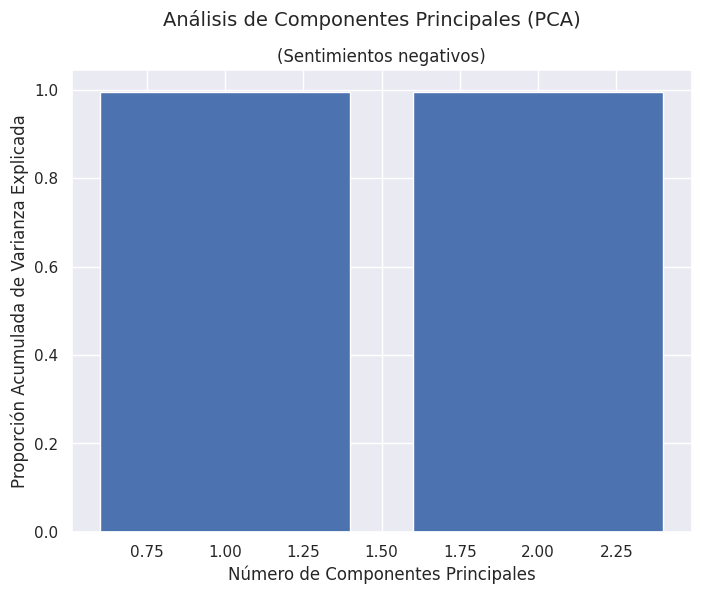

In [74]:
# Mostrar las proporciones acumuladas en un gráfico (sentimientos negativos)
plt.figure(figsize=(8, 6))
plt.bar(df_cumulative_explained_variance_neg['Componente Principal'], df_cumulative_explained_variance_neg['Proporción Acumulada de Varianza Explicada'])
plt.suptitle('Análisis de Componentes Principales (PCA)', fontsize = 14)
plt.title('(Sentimientos negativos)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.grid(True)
plt.show()

In [75]:
# Ajustamos y transformamos los datos
X_mini_2d_neu = pca.fit_transform(X_mini_neu)

In [76]:
# Obtener las proporciones de varianza explicada por cada componente principal
explained_variance_ratio_neu = pca.explained_variance_ratio_

In [77]:
# Calcular la suma acumulada de las proporciones de varianza explicada
cumulative_explained_variance_neu = np.cumsum(explained_variance_ratio_neu)

In [78]:
# Crear un DataFrame para visualizar las proporciones acumuladas de sentimientos neutros
df_cumulative_explained_variance_neu = pd.DataFrame({
    'Componente Principal': np.arange(1, len(cumulative_explained_variance_neu) + 1),
    'Proporción Acumulada de Varianza Explicada': cumulative_explained_variance_neu
})

df_cumulative_explained_variance_neu

,Componente Principal,Proporción Acumulada de Varianza Explicada
0,1,0.243929
1,2,0.253351


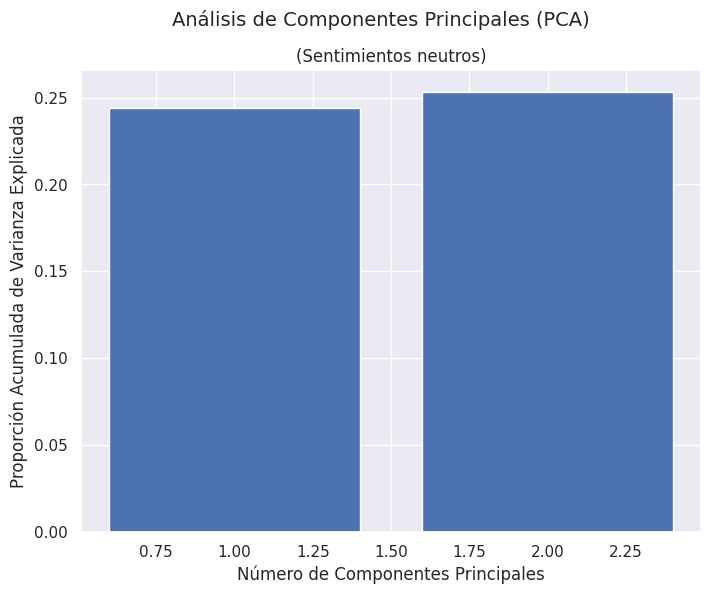

In [79]:
# Mostrar las proporciones acumuladas en un gráfico (sentimientos neutros)
plt.figure(figsize=(8, 6))
plt.bar(df_cumulative_explained_variance_neu['Componente Principal'], df_cumulative_explained_variance_neu['Proporción Acumulada de Varianza Explicada'])
plt.suptitle('Análisis de Componentes Principales (PCA)', fontsize = 14)
plt.title('(Sentimientos neutros)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.grid(True)
plt.show()

De los resultados anteriores se deduce que, mientras que la explicación de comportamiento de los sentimientos positivos y negativos se pueden capturar con tan solo 2 variables esto no se logra en el caso de los neutros.

Esto tiene mucho sentido, ya que es mucho más difícil capturar el sentido de un mensaje considerado neutro que el que hay en los otros 2 casos, en donde la línea del mesaje es mucho más clara.

Esto, lo qie significa es que el análisis de la relación de palabras arroja resultados relevantes en el caso de los sentimientos positivos y negativos pero carece de sentido para los comentarios que representan sentimientos neutros, por lo que dicho sentimiento se excluyó del análisis siguiente.

In [80]:
X_mini_2d_pos[0:50, 0]

array([5.1358266, 4.879841 , 5.081126 , 5.0972533, 4.974137 , 5.4525332,
       5.125867 , 5.129559 , 5.250331 , 5.1174936, 5.0072885, 5.120153 ,
       5.2640033, 5.251736 , 4.8868947, 5.105997 , 4.6393657, 6.122943 ,
       5.195502 , 5.123008 , 5.076829 , 5.318961 , 5.1276956, 5.2618237,
       5.246197 , 5.2657433, 5.1335173, 5.1628876, 5.4616055, 5.0472317,
       5.8669963, 5.2536707, 5.076463 , 5.3695383, 5.1816487, 5.0300403,
       5.466474 , 5.062848 , 5.122773 , 5.4645967, 5.0832725, 5.0540094,
       4.9887676, 5.2043667, 4.9988914, 5.0303693, 5.1690764, 4.9123697,
       5.9755764, 4.810873 ], dtype=float32)

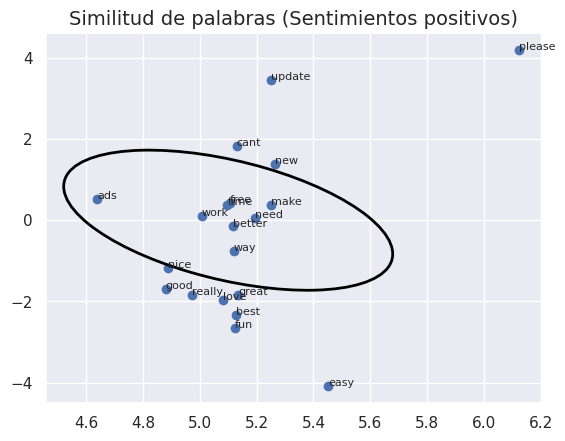

In [81]:
words_pos = model_mini_pos.wv.index_to_key[0:20]
x_pos = X_mini_2d_pos[0:20, 0]
y_pos = X_mini_2d_pos[0:20, 1]

fig, ax = plt.subplots()

scatter = ax.scatter(x_pos, y_pos)

for i, word in enumerate(words_pos):
   plt.annotate(word, xy=(x_pos[i], y_pos[i]), fontsize= 8)

# Dibujar un óvalo
ellipse = patches.Ellipse((5.1, 0), 3.5, 1.0, angle=100, edgecolor='black', facecolor='none', linewidth=2)
ax.add_patch(ellipse)

# Ajustar el tamaño de la letra en las etiquetas y el título
ax.set_title('Similitud de palabras (Sentimientos positivos)', fontsize=14)

# Mostrar el gráfico
plt.show()

plt.show()

Más allá de las palabras positivas (love, nice, good, etc) características de los sentimientos positivos, se encuentra relación entre las palabras **"free"**, **"work"**, **"time"** y **"ads"**.

En la siguiente celda se buscan las palabras más relacionadas con **"work"** en donde pesq que la App trabaje apropiadamente (**"properly"**, sin problemas **"problems** y es importante que funciones en **iphone**.



In [82]:
model_mini_pos.wv.most_similar(['work'])

[('problems', 0.9938257932662964),
 ('dev', 0.9932864904403687),
 ('v', 0.993145763874054),
 ('properly', 0.993130624294281),
 ('samsung', 0.9930428862571716),
 ('running', 0.9928594827651978),
 ('phones', 0.992806613445282),
 ('install', 0.992718517780304),
 ('seems', 0.9926567077636719),
 ('failed', 0.9926556944847107)]

Por otro lado, en los sentimientos positivos los usuarios valoran que la app sea bonita, que tenga un buen desempeño ("awesome") o que les permita "matar el tiempo". Siendo lo estético el factor más importante.

In [83]:
model_mini_pos.wv.most_similar(['love'])

[('awesome', 0.9973245859146118),
 ('amazing', 0.9971330761909485),
 ('deals', 0.9960570335388184),
 ('challenging', 0.9950332641601562),
 ('addictive', 0.9945463538169861),
 ('cute', 0.993929922580719),
 ('overall', 0.9936151504516602),
 ('absolutely', 0.9933260083198547),
 ('gameplay', 0.9932630062103271),
 ('pretty', 0.9931309819221497)]

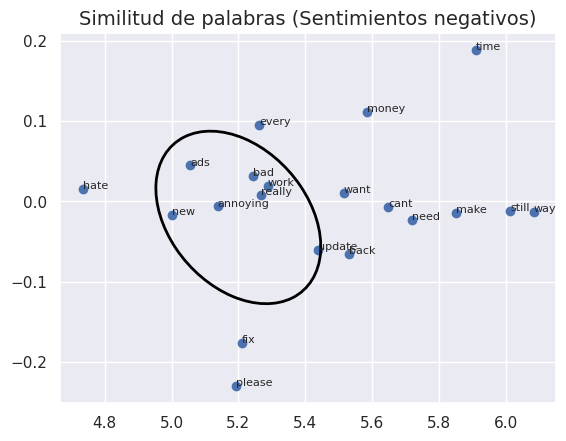

In [84]:
words_neg = model_mini_neg.wv.index_to_key[0:20]
x_neg = X_mini_2d_neg[0:20, 0]
y_neg = X_mini_2d_neg[0:20, 1]

fig, ax = plt.subplots()

scatter = ax.scatter(x_neg, y_neg)

#ax.figure(figsize=(7,7))

for i, word in enumerate(words_neg):
   plt.annotate(word, xy=(x_neg[i], y_neg[i]), fontsize= 8)

# Dibujar un óvalo
ellipse = patches.Ellipse((5.2, -0.02), 0.2, 0.5, angle=80, edgecolor='black', facecolor='none', linewidth=2)
ax.add_patch(ellipse)

# Ajustar el tamaño de la letra en las etiquetas y el título
ax.set_title('Similitud de palabras (Sentimientos negativos)', fontsize=14)

# Mostrar el gráfico
plt.show()

plt.show()

En el caso de los sentimientos negativos, las palabras encontradas nos dan información mucho más precisa que en los sentimientos positivos. Las palbras relevantes son **"annoying"** y **"ads"**.

Como vemos, en la celda inferior, **"ads"** se relaciona con **"annoying"**, **"hate"** y **terrible**.

In [85]:
model_mini_neg.wv.most_similar(['ads'])

[('annoying', 0.9997139573097229),
 ('really', 0.9996587634086609),
 ('ad', 0.9996567964553833),
 ('fun', 0.9995916485786438),
 ('hate', 0.9995619058609009),
 ('watch', 0.9995599389076233),
 ('playing', 0.9995519518852234),
 ('minutes', 0.9995390772819519),
 ('bad', 0.9995216727256775),
 ('video', 0.999521017074585)]

In [86]:
model_mini_neg.wv.most_similar(['annoying', 'ads', 'money', 'back'])

[('think', 0.9998584389686584),
 ('way', 0.9998558759689331),
 ('really', 0.9998493790626526),
 ('lot', 0.9998461604118347),
 ('difficult', 0.999844491481781),
 ('stupid', 0.9998385310173035),
 ('makes', 0.9998356699943542),
 ('people', 0.999834418296814),
 ('playing', 0.9998288154602051),
 ('need', 0.9998259544372559)]

### Entrenamiento del modelo de clasificación

Como se mencionó con anterioridad la base de datos con la que se está trabajando contiene las siguientes variables:

*   **App**: Nombre de la App que se está evaluando
*   **Translated_Review** Review de la App traducida al inglés.
*   **Sentiment**: El sentimiento de la Review (negative, neutral, positive)
*   **Sentiment_Polarity**: Intensidad del Sentimiento (-1 a 1)
*   **Sentiment_Subjectivity**: Subjetividad del sentimiento
*   **Rating**: Evaluación de la App (Estrellas).
*   **Type**: Tipo de App (Free, Paid)
*   **Price**: Precio de la App
*   **Content Rating**: Clasificación de Público ('Everyone 10+', 'Everyone', 'Mature 17+', 'Teen', 'Adults only 18+')
*   **Geres**: Género de la App

Y ya se construyó la variables **reviews_without_stopwords** que contiene la información limpia, tokenizada y procesada de la columna **Translated_Review**


In [87]:
df.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Type,Price,Content Rating,Genres,reviews_without_stopwords
0,10 Best Foods for You,"[i, like, eat, delicious, food, thats, im, coo...",Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,Free,0,Everyone 10+,Health & Fitness,"[eat, delicious, food, thats, cooking, food, c..."
1,10 Best Foods for You,"[this, help, eating, healthy, exercise, regula...",Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,Free,0,Everyone 10+,Health & Fitness,"[help, eating, healthy, exercise, regular, basis]"


Esta información nos permite determinar los datos que se utilizarán para este análisis, que serán **"Sentiment"**, **"App"**, **"Translated_Review"**, **"Category"**, **"Type"**, **Content_Rating**, y **"reviews_without_stopwords"**.

Como se muestra en la gráfica al inicio del análisis la variable **"Rating"** no se va a utilizar debido a la incongruencia que mantiene con el **"Sentimiento"**.



Recordando que la Frecuencia de Sentimientos está muy dispareja, para correr el modelo se eliminarán los comentarios tokenizados negativos y neutros más cortos hasta igualar el número de comentarios positivos, con la intención de capturar la mayor cantidad de información y evitar sesgos de estimación en el modelo.

Esto se realoza en el siguiente apartado

#### Ajuste del número de observaciones

In [88]:
# Primero se calcula la longitud de cada lista de tokens y almacenarla en una nueva columna
df['token_length'] = df['reviews_without_stopwords'].apply(len)

In [89]:
# Encontrar los índices de los 3,874 textos tokenizados más largos para cada categoría
indices_maximos_por_categoria = df.groupby('Sentiment')['token_length'].nlargest(3874).index.levels[1]

In [90]:
# Obtener los textos tokenizados más largos para cada categoría
dfNew = df.loc[indices_maximos_por_categoria, ["Sentiment", "App", "Translated_Review", "Category", "Type", "Content Rating", "reviews_without_stopwords"]]

In [91]:
dfNew.head()

,Sentiment,App,Translated_Review,Category,Type,Content Rating,reviews_without_stopwords
6,Neutral,10 Best Foods for You,"[looking, forward, app]",HEALTH_AND_FITNESS,Free,Everyone 10+,"[looking, forward]"
7,Neutral,10 Best Foods for You,"[it, helpful, site, it, help, foods, get]",HEALTH_AND_FITNESS,Free,Everyone 10+,"[helpful, site, help, foods]"
19,Neutral,10 Best Foods for You,"[god, health]",HEALTH_AND_FITNESS,Free,Everyone 10+,"[god, health]"
22,Neutral,10 Best Foods for You,"[i, found, lot, wealth, form, health]",HEALTH_AND_FITNESS,Free,Everyone 10+,"[found, lot, wealth, form, health]"
26,Neutral,10 Best Foods for You,"[on, test]",HEALTH_AND_FITNESS,Free,Everyone 10+,[test]


La gráfica inferior muestra que el ajuste de las observaciones negativas y neutras indicado, se realizó de forma correcta.

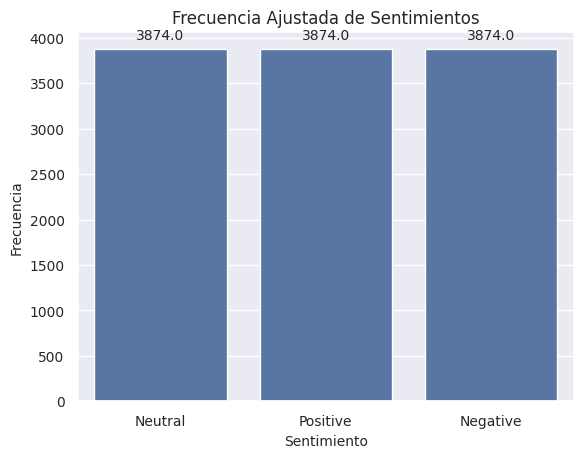

In [92]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
#sns.set(style="whitegrid")

# Se configura el tamaño de las barras
ax = sns.countplot(x='Sentiment', data=dfNew, order=dfNew['Sentiment'].value_counts().index)

# Se agregan etiquetas y título
plt.xlabel('Sentimiento', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.title('Frecuencia Ajustada de Sentimientos', fontsize=12)

# Se configura el tamaño de fuente en los ejes
ax.tick_params(axis='both', labelsize=10)

# Se agregan las etiquetas de tamaño en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Se muestra el gráfico
plt.show()

In [93]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11622 entries, 6 to 37426
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sentiment                  11622 non-null  object
 1   App                        11622 non-null  object
 2   Translated_Review          11622 non-null  object
 3   Category                   11622 non-null  object
 4   Type                       11622 non-null  object
 5   Content Rating             11622 non-null  object
 6   reviews_without_stopwords  11622 non-null  object
dtypes: object(7)
memory usage: 726.4+ KB


#### Construir nuevo dataframe para modelo

Para el modelo se debe recuperar el mensaje, ya limpio de basura pero incluyendo todavía las palabras de parada, para que en el análisis de sentimiento no se pierda la intención del mismo y pueda capturarse correctamente la información para la predicción del modelo.

In [94]:
def remove_punctuation(text):
    final = " ".join(u for u in text if u not in ("?", ".", ";", ":", "!",'"', ","))
    return final
#dfNew['text'] = dfNew['text'].apply(remove_punctuation)
#df = df.dropna(subset=['text_without_stopwords'])
dfNew['Translated_Review'] = dfNew['Translated_Review'].apply(remove_punctuation)

In [95]:
dfNew['Translated_Review']

6                                      looking forward app
7                        it helpful site it help foods get
19                                              god health
22                          i found lot wealth form health
26                                                 on test
                               ...                        
37419    what nonsensical app doesnt owner postings plu...
37420    no response support team after i login unable ...
37423    if photos posted portal load fit purpose im su...
37424    dumb app i wanted post property rent give opti...
37426    useless app i searched flats kondapur hyderaba...
Name: Translated_Review, Length: 11622, dtype: object

Se aplicará un LabelEncoder para transformar las variables categóricas.


In [96]:
dfNew.head(2)

,Sentiment,App,Translated_Review,Category,Type,Content Rating,reviews_without_stopwords
6,Neutral,10 Best Foods for You,looking forward app,HEALTH_AND_FITNESS,Free,Everyone 10+,"[looking, forward]"
7,Neutral,10 Best Foods for You,it helpful site it help foods get,HEALTH_AND_FITNESS,Free,Everyone 10+,"[helpful, site, help, foods]"


In [97]:
encoder = LabelEncoder()

In [98]:
#dfNew["Sentiment"] = encoder.fit_transform(dfNew["Sentiment"])
dfNew["App"] = encoder.fit_transform(dfNew["App"])
dfNew["Category"] = encoder.fit_transform(dfNew["Category"])
dfNew["Content Rating"] = encoder.fit_transform(dfNew["Content Rating"])
dfNew["Type"] = encoder.fit_transform(dfNew["Type"])
dfNew["Sentiment"] = encoder.fit_transform(dfNew["Sentiment"])

In [99]:
dfNew.head()

,Sentiment,App,Translated_Review,Category,Type,Content Rating,reviews_without_stopwords
6,1,0,looking forward app,15,0,2,"[looking, forward]"
7,1,0,it helpful site it help foods get,15,0,2,"[helpful, site, help, foods]"
19,1,0,god health,15,0,2,"[god, health]"
22,1,0,i found lot wealth form health,15,0,2,"[found, lot, wealth, form, health]"
26,1,0,on test,15,0,2,[test]


Como se muestra en la celda inferior se le asignó el 0 a los sentimientos negativos, el 1 a los neutros y el 2 a los positivos.

In [100]:
for categoria, numero in zip(encoder.classes_, encoder.transform(encoder.classes_)):
    print(f"Número: {numero}, Categoría: {categoria}")

Número: 0, Categoría: Negative
Número: 1, Categoría: Neutral
Número: 2, Categoría: Positive


Ahora dividiremos el dataset en conjuntos de entrenamiento y prueba. El 80 % de los datos se utilizará para entrenamiento y el 20 % para pruebas.


In [101]:
X = dfNew.drop(['Sentiment'], axis=1)
y = dfNew['Sentiment']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Se crea una bolsa de palabras

Usaremos un vectorizador de conteo de la biblioteca Scikit-learn.

Esto transformará el texto en nuestro dataset en un modelo de bolsa de palabras, que contendrá una matriz dispersa de enteros. Se contará e imprimirá el número de ocurrencias de cada palabra.

Tendremos que convertir el texto en un modelo de bolsa de palabras ya que de otra manera el algoritmo de regresión logística no puede entender el texto.

In [103]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X_train = vectorizer.fit_transform(X_train['Translated_Review'])
X_test = vectorizer.transform(X_test['Translated_Review'])

#### Se entrena el modelo

In [104]:
lr_model = LogisticRegression(max_iter=10000)

In [105]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [106]:
predictions = lr_model.predict(X_test)

predictions

array([0, 1, 1, ..., 0, 1, 0])

#### Se evaluán algunos resultados

Ahora hagamos una prueba de predicción con la siguiente reseña en inglés: "Duolingo for me has been really good in terms of learning, in all aspects, but there are some parts that I wish that could be changed. In the newest update, they removed the bar telling you how long of that specific achievement you need to advance to the next level (i.e. early riser achievement) so I wish that could be added back so I can keep track of my progress. But overall, 4 stars.." **El resultado debiera ser positivo, es decir 2.**

In [107]:
review_test = "Duolingo for me has been really good in terms of learning, in all aspects, but there are some parts that I wish that could be changed. In the newest update, they removed the bar telling you how long of that specific achievement you need to advance to the next level (i.e. early riser achievement) so I wish that could be added back so I can keep track of my progress. But overall, 4 stars."

# Debemos hacer que nuestro texto de test pase por el mismo proceso que todo el dataset de train
review_convert = vectorizer.transform([review_test])
prediction_test = lr_model.predict(review_convert)
prediction_test

array([2])

Ahora hagamos una prueba de predicción con una reseña negativa en inglés: "I have had an account for over 8 years, and the last few updates have made this app less usable and less helpful. The audio does not pick up at times even when you're in a quiet room, there is no explanation for why stuff is wrong sometimes. The animations they added to show progress on daily quests are just drawn out for unknown reasons. But lucky for all of us, rather than addressing these issues, they just added an avatar creator feature that is just so weird and also feels unnecessary." **El resultado debiera ser negativo, es decir 0.**

In [108]:
review_test = "I have had an account for over 8 years, and the last few updates have made this app less usable and less helpful. The audio does not pick up at times even when you're in a quiet room, there is no explanation for why stuff is wrong sometimes. The animations they added to show progress on daily quests are just drawn out for unknown reasons. But lucky for all of us, rather than addressing these issues, they just added an avatar creator feature that is just so weird and also feels unnecessary."

# Debemos hacer que nuestro texto de test pase por el mismo proceso que todo el dataset de train
review_convert = vectorizer.transform([review_test])
prediction_test = lr_model.predict(review_convert)
prediction_test

array([0])

## Actividad 3. Graficación y Métricas

TPOT (Tree-based Pipeline Optimization Tool) es una herramienta de optimización automática que busca automáticamente el mejor modelo y la mejor configuración de hiperparámetros para un problema específico.

In [109]:
# Definir el pipeline con un clasificador de regresión logística
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Inicializar TPOT con el pipeline y configuración de optimización para matrices dispersas
tpot = TPOTClassifier(config_dict='TPOT sparse', generations=5, population_size=20, random_state=30, verbosity=2, scoring='accuracy', n_jobs=-1)

# Realizar la búsqueda de modelos y hiperparámetros
tpot.fit(X_train, y_train)


                                                                                
Generation 1 - Current best internal CV score: 0.8879214168792332
                                                                             
Generation 2 - Current best internal CV score: 0.8879214168792332
                                                                             
Generation 3 - Current best internal CV score: 0.8879214168792332
                                                                              
Generation 4 - Current best internal CV score: 0.8879214168792332
                                                                              
Generation 5 - Current best internal CV score: 0.8879214168792332
                                                           
Best pipeline: LinearSVC(input_matrix, C=0.5, dual=False, loss=squared_hinge, penalty=l1, tol=0.1)


TPOTClassifier(config_dict='TPOT sparse', generations=5, n_jobs=-1,
               population_size=20, random_state=30, scoring='accuracy',
               verbosity=2)

In [110]:
# Entrenar el modelo y obtener predicciones
tpot_pred = tpot.predict(X_test)


#### Matriz de confusión (Estimación manual)

In [111]:
cf_matrix_lr = confusion_matrix(predictions,y_test)
cf_matrix_lr

array([[624,  33,  90],
       [ 64, 756,  15],
       [ 62,   7, 674]])

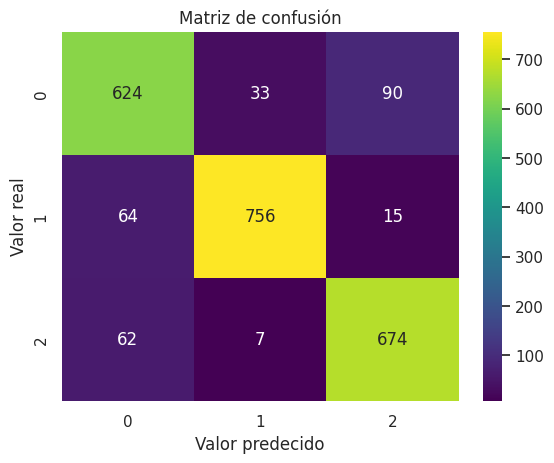

In [112]:
sns.heatmap(cf_matrix_lr, annot= True, fmt= '.0f', cmap= 'viridis')
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

La matriz de confusión muestra que el modelo predijo correctamente a 624 comentarios negativos, 756 comentarios neutros y 674 positivos, lo que implica que el modelo acertó la intención del 88.34% de los comentarios.

#### Matriz de precisión (Estimación manual)

In [113]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       747
           1       0.95      0.91      0.93       835
           2       0.87      0.91      0.89       743

    accuracy                           0.88      2325
   macro avg       0.88      0.88      0.88      2325
weighted avg       0.88      0.88      0.88      2325



La precisión general del modelo en los datos de prueba es de alrededor del 88 %, que es justamente lo que se describió en la matriz de confusión, previamente. El resultado es óptimo, nos indica una buena capacidad de predicción y una poco probabilidad de sobreajuste en el modelo.


#### Matriz de confusión (Estimación tpot)

In [114]:
# Crear la matriz de confusión
cf_matrix_tpot = confusion_matrix(y_test, tpot_pred)
cf_matrix_tpot

array([[641,  47,  62],
       [ 19, 770,   7],
       [ 69,  13, 697]])

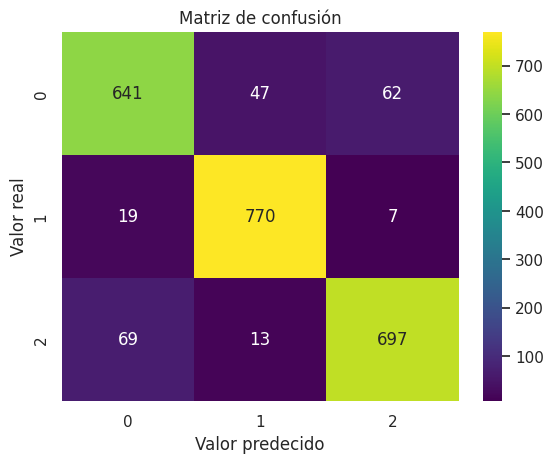

In [115]:
sns.heatmap(cf_matrix_tpot, annot= True, fmt= '.0f', cmap= 'viridis')
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

La matriz de confusión muestra que el modelo predijo correctamente a 641 comentarios negativos, 770 comentarios neutros y 697 positivos, lo que implica que el modelo acertó la intención del 90.66% de los comentarios.

#### Matriz de precisión (Estimación tpot)

In [116]:
print(classification_report(tpot_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       729
           1       0.97      0.93      0.95       830
           2       0.89      0.91      0.90       766

    accuracy                           0.91      2325
   macro avg       0.91      0.91      0.91      2325
weighted avg       0.91      0.91      0.91      2325



La precisión general del modelo en los datos de prueba es de alrededor del 91 %, que es justamente lo que se describió en la matriz de confusión, previamente.
Los resultados, tanto de la matriz de confusión como la de presición muestran que la función encontrada por el método tpot mejoró la precisión de las predicciones.

In [117]:
X_test_csr = csr_matrix(X_test)

In [118]:
# Indices de falsos positivos
false_positives = np.where((tpot_pred == 2) & (y_test == 0))[0]

# Indices de falsos negativos
false_negatives = np.where((tpot_pred == 0) & (y_test == 2))[0]

# Observaciones correspondientes a falsos positivos y falsos negativos
observations_false_positives = X_test_csr[false_positives]
observations_false_negatives = X_test_csr[false_negatives]

In [119]:
observations_false_positives

<62x16219 sparse matrix of type '<class 'numpy.int64'>'
	with 1692 stored elements in Compressed Sparse Row format>

In [120]:
# dense_matrix = sparse_matrix.toarray(observations_false_positives)
# print("Matriz densa:")
# print(dense_matrix)

NameError: name 'sparse_matrix' is not defined